In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Reviews.csv/Reviews.csv')

In [ ]:
df = reduce_mem_usage(df)

Mem. usage decreased to 28.73 Mb (33.7% reduction)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


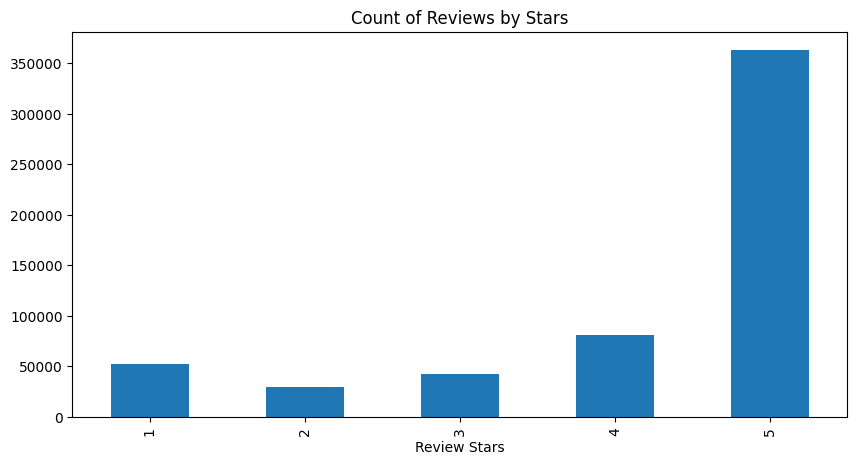

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
import string

In [ ]:
df['Text']= df['Text'].astype(str)

In [ ]:
punct_to_remove = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct_to_remove))

df['Text'] = df['Text'].apply(lambda text: remove_punctuation(text))

In [ ]:
','.join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df['Text'] = df['Text'].apply(lambda text: remove_stopwords(text))

In [ ]:
tokenize = nltk.word_tokenize(df['Text'][100])
print(tokenize)

['The', 'mouth', 'says', 'How', 'I', 'love', 'thee', 'let', 'count', 'waysbr', 'If', 'like', 'apple', 'products', 'must', 'item', 'The', 'draw', 'back', 'shipping', 'cost', 'These', 'heavy']


In [ ]:
tokenize[:10]

['The', 'mouth', 'says', 'How', 'I', 'love', 'thee', 'let', 'count', 'waysbr']

In [ ]:
tagged = nltk.pos_tag(tokenize)
tagged[:10]

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 ('How', 'WRB'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('thee', 'JJ'),
 ('let', 'NN'),
 ('count', 'NN'),
 ('waysbr', 'VB')]

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["Text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('I', 1453306),
 ('br', 264682),
 ('like', 246046),
 ('The', 222790),
 ('good', 182162),
 ('taste', 161629),
 ('one', 154276),
 ('This', 151646),
 ('coffee', 147616),
 ('It', 145425)]

# VADER Seniment Scoring
In VADER (Valence Aware Dictionary and sEntiment Reasoner), the terms neg, pos, and neu represent different aspects of sentiment expressed in a piece of text. These aspects are determined based on the intensity of positive, negative, and neutral sentiments present in the text, respectively.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(df['Text'][10])

{'neg': 0.028, 'neu': 0.772, 'pos': 0.2, 'compound': 0.9528}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.531,0.469,0.9413,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I bought several Vitality canned dog food prod...
1,2,0.092,0.801,0.106,0.0762,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled Jumbo Salted Peanutsth...
2,3,0.144,0.614,0.241,0.8073,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This confection around centuries It light pill...
3,4,0.000,0.868,0.132,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If looking secret ingredient Robitussin I beli...
4,5,0.000,0.417,0.583,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy great price There wide assortment ...


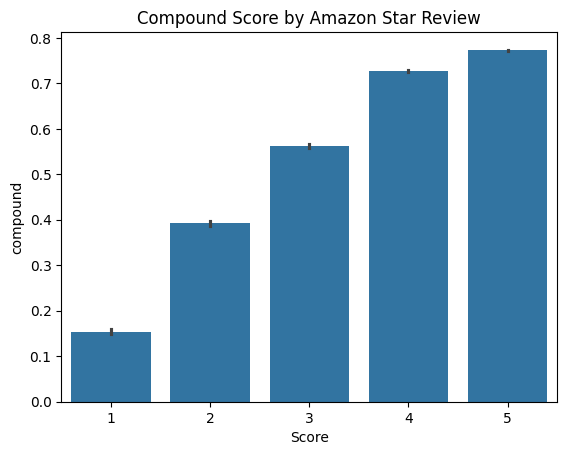

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

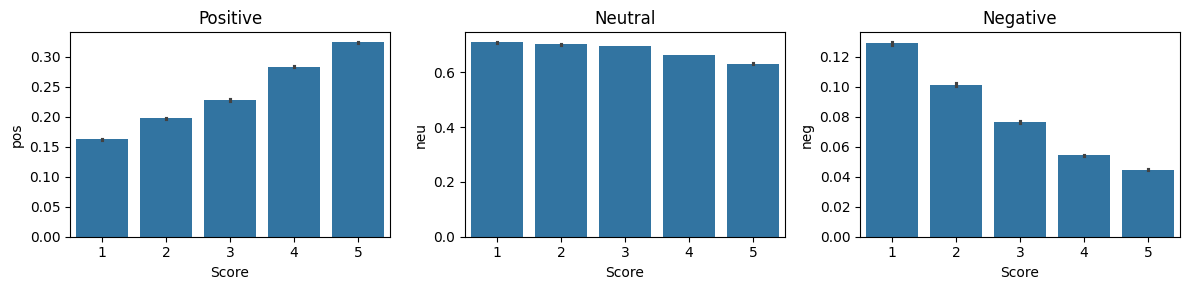

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
sent_pipeline('I am happy while performing sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.9998782873153687}]

In [ ]:
sent_pipeline('I am sad while performing sentiment analysis')

[{'label': 'NEGATIVE', 'score': 0.9993695616722107}]

In [ ]:
sent_pipeline('I love cooking its verry fun')

[{'label': 'POSITIVE', 'score': 0.9997420907020569}]

In [ ]:
sent_pipeline('this product is ok ok')

[{'label': 'POSITIVE', 'score': 0.9998152852058411}]

In [ ]:
sent_pipeline('the performance sentiment analysis is avrage')

[{'label': 'NEGATIVE', 'score': 0.985185444355011}]

In [ ]:
sent_pipeline('boooo')

[{'label': 'NEGATIVE', 'score': 0.7565670609474182}]

# Word Cloud

In [ ]:
from wordcloud import WordCloud

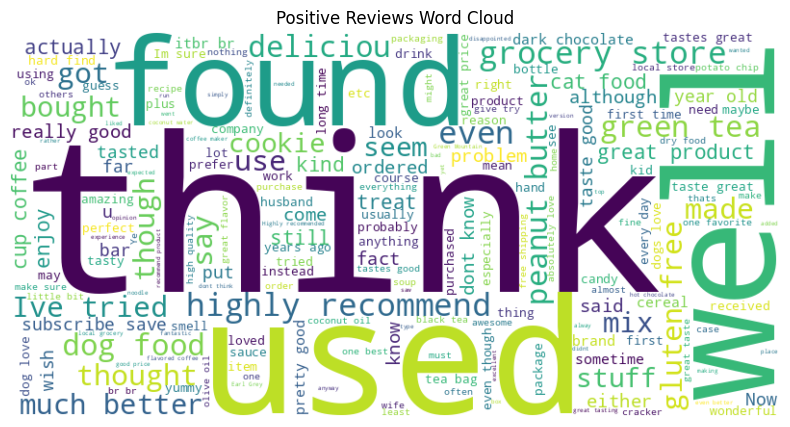

In [ ]:
# prompt: how create word cloud graph for positive and negative data

positive_reviews = vaders[vaders['compound'] > 0.5]['Text']
negative_reviews = vaders[vaders['compound'] < -0.5]['Text']

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')
plt.show()



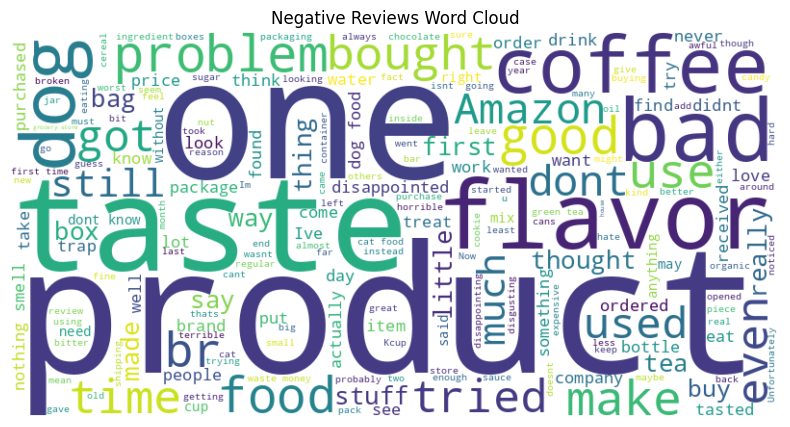

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()


# LSTM Regression

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Prepare the data for LSTM
X = df['Text']
y = df['Score']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # You can adjust the num_words
tokenizer.fit_on_texts(X_train)


In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [ ]:
# Pad the sequences to have the same length
max_length = 100  # You can adjust the max_length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression


In [ ]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 1670s 261ms/step - loss: 1.1225 - mae: 0.7241 - val_loss: 0.6363 - val_mae: 0.5401
Epoch 2/5
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 1703s 266ms/step - loss: 0.5936 - mae: 0.5003 - val_loss: 0.5952 - val_mae: 0.5182
Epoch 3/5
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 1691s 255ms/step - loss: 0.5206 - mae: 0.4596 - val_loss: 0.5565 - val_mae: 0.4595
Epoch 4/5
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 1478s 231ms/step - loss: 0.4744 - mae: 0.4350 - val_loss: 0.5541 - val_mae: 0.4434
Epoch 5/5
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 1479s 231ms/step - loss: 0.4416 - mae: 0.4178 - val_loss: 0.5377 - val_mae: 0.4561


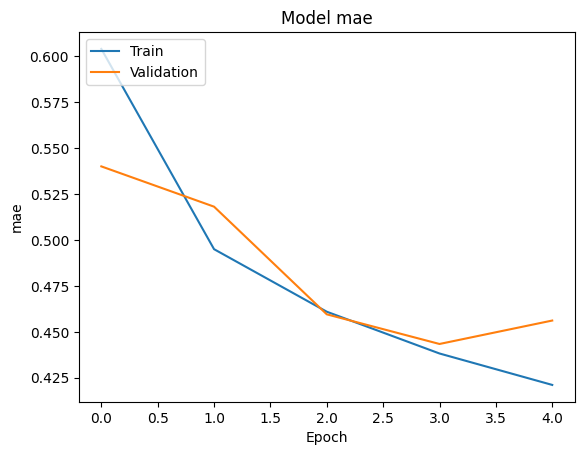

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

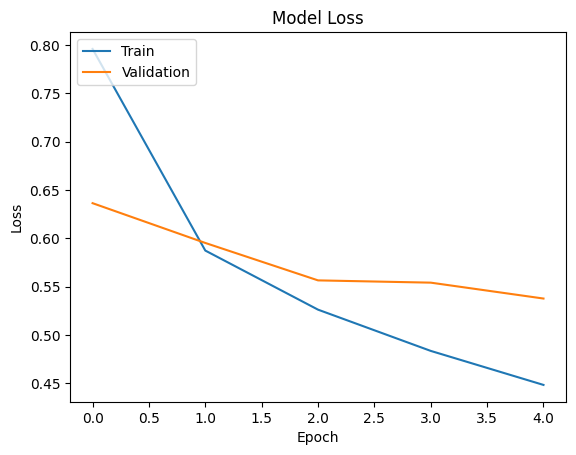

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test_pad, y_test)
print('Test Loss:', loss)
print('Test MAE:', mae)

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 194s 55ms/step - loss: 0.5346 - mae: 0.4539
Test Loss: 0.5292759537696838
Test MAE: 0.451739102602005


In [ ]:
# Make predictions
y_pred = model.predict(X_test_pad)


3553/3553 ━━━━━━━━━━━━━━━━━━━━ 191s 54ms/step


In [ ]:
# prompt: how can know sentence is positive or negative or nuteral

def get_sentiment(text):
  """
  Analyzes the sentiment of a given text using VADER.

  Args:
    text: The text to analyze.

  Returns:
    A string indicating the sentiment ('positive', 'negative', 'neutral').
  """
  scores = sia.polarity_scores(text)
  compound_score = scores['compound']

  if compound_score >= 0.05:
    return 'positive'
  elif compound_score <= -0.05:
    return 'negative'
  else:
    return 'neutral'

# Example usage:
text = "This is a great product!"
sentiment = get_sentiment(text)
print(f"The sentiment of '{text}' is: {sentiment}")

text = "I hate this product, it's terrible."
sentiment = get_sentiment(text)
print(f"The sentiment of '{text}' is: {sentiment}")

text = "This product is okay."
sentiment = get_sentiment(text)
print(f"The sentiment of '{text}' is: {sentiment}")


The sentiment of 'This is a great product!' is: positive
The sentiment of 'I hate this product, it's terrible.' is: negative
The sentiment of 'This product is okay.' is: positive


# RNN

In [ ]:
# prompt: how we do rnn binary clasification on above dataset

from tensorflow.keras.layers import SimpleRNN

# Prepare the data for RNN binary classification
X = df['Text']
y = df['Score']
y_binary = (y >= 4).astype(int)  # Convert to binary classification (positive/negative)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


# Build the RNN model for binary classification
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1)


# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

